# <center> BLG 527E Machine Learning Homework 2

## Question 1

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# Add upper folder to pythons' path to reach custom functions
if '..' not in sys.path:
    sys.path.insert(0, '..')

%load_ext autoreload
%autoreload 2

In [2]:
SEED = 42

In [3]:
# Given mean and variance matricies
mu1 = np.array([1, 2])
mu2 = np.array([3, 5])
sigma1 = np.array([[2, 1], [1, 3]])
sigma2 = np.array([[1, -0.8], [-0.8, 3]])

### 1.a - Dataset Generation

In [4]:
# Random dataset generation
np.random.seed(SEED)

# Generate Features
X1 = np.random.multivariate_normal(mu1, sigma1, 1000)
X2 = np.random.multivariate_normal(mu2, sigma2, 1000)

# Class Labels
y1 = np.zeros(1000)
y2 = np.ones(1000)

# Combine Datasets
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

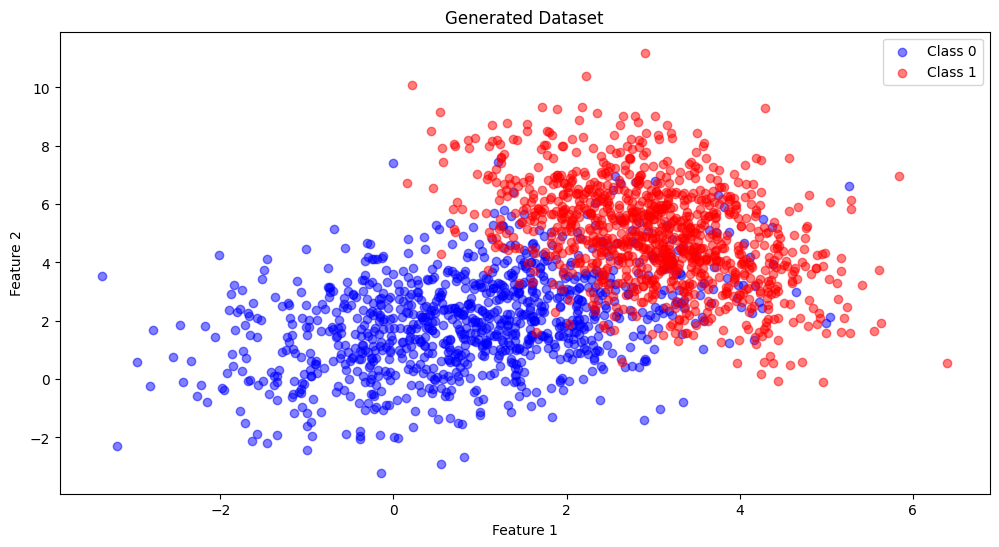

In [33]:
# Data Visualization
plt.figure(figsize=(12, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Class 0', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Class 1', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Dataset')
plt.legend()
plt.show()

### 1.b - Train-Test Split and Mean, Covariance Calculation

Equations from the book. Implementation will be based on these equatinos.

1. $ E[\mathbf{x}] = \boldsymbol{\mu} = [\mu_1, \ldots, \mu_d]^T $

2. $ \sigma_{ij} \equiv \text{Cov}(X_i, X_j) = E[(X_i - \mu_i)(X_j - \mu_j)] = E[X_i X_j] - \mu_i \mu_j $

3. $ \Sigma \equiv \text{Cov}(\mathbf{X}) = E[(\mathbf{X} - \boldsymbol{\mu})(\mathbf{X} - \boldsymbol{\mu})^T] = E[\mathbf{XX}^T] - \boldsymbol{\mu}\boldsymbol{\mu}^T $ 

In [6]:
from sklearn.model_selection import train_test_split
from utils import mean, covariance1, covariance2 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [8]:
# Calculate Mean Matricies
X_train_mu_0 = mean(X_train[y_train==0])
X_train_mu_1 = mean(X_train[y_train==1])
X_train_mu_0, X_train_mu_1, X_train_mu_0 == np.mean(X_train[y_train == 0], axis=0)  # Check the custom written mean function 

(array([[0.93930963, 1.99933291]]),
 array([[2.99097327, 5.01891925]]),
 array([[ True,  True]]))

In [9]:
# Calculate Covariance Matrixes using first equation
X_train_cov_0 = covariance1(X_train[y_train==0], X_train_mu_0)
X_train_cov_1 = covariance1(X_train[y_train==1], X_train_mu_1)
X_train_cov_0, X_train_cov_1, X_train_cov_0 == np.cov(X_train[y_train == 0], rowvar=False)

(array([[1.96601833, 0.86632616],
        [0.86632616, 2.80465717]]),
 array([[ 0.9988885 , -0.7843171 ],
        [-0.7843171 ,  3.12234002]]),
 array([[False, False],
        [False, False]]))

In [10]:
## Calculate Covariance Matrixes using second equation

# X_train_cov_0 = covariance2(X_train[y_train==0], X_train_mu_0)
# X_train_cov_1 = covariance2(X_train[y_train==1], X_train_mu_1)
# X_train_cov_0, X_train_cov_1, X_train_cov_0 == np.cov(X_train[y_train == 0], rowvar=False)

In [11]:
np.cov(X_train[y_train == 0], rowvar=False)

array([[1.96601833, 0.86632616],
       [0.86632616, 2.80465717]])

As we can see from the results above the covariance matrix calculation with first equation is much more similar to numpys' covariance matrix calculation method. Therefore i am going to use the first method.

### 1.c - Quadratic Discriminant Classifier

Quadratic Discriminant Classifier can be implemented with following equation.

$ g_i(x) = -\frac{1}{2} \log |\Sigma_i| - \frac{1}{2} (x - m_i)^T \Sigma_i^{-1} (x - m_i) + \log \hat{P}(C_i) $

In [23]:
from qda import QDA

In [24]:
mean_vectors = {0: X_train_mu_0, 1: X_train_mu_1}
cov_matrices = {0: X_train_cov_0, 1: X_train_cov_1}

qda_model = QDA(mean_vectors, cov_matrices)
qda_model.fit(y_train)


In [25]:
# Obtain the training and test errors
y_train_pred = qda_model.predict(X_train)
y_test_pred = qda_model.predict(X_test)

train_error_qda = np.mean(y_train_pred != y_train)
test_error_qda = np.mean(y_test_pred != y_test)

train_error_qda, test_error_qda

(0.09125, 0.09)

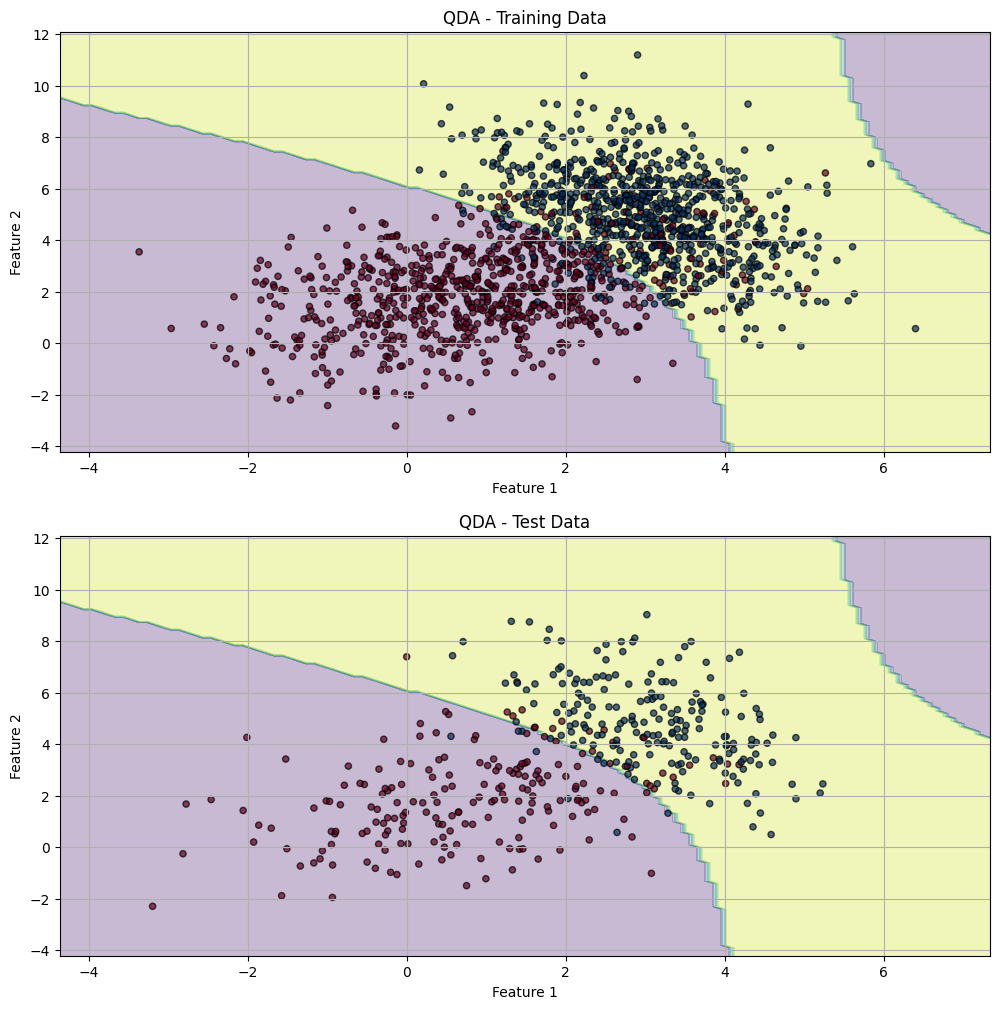

In [26]:
qda_model.visualize(X, y, SEED)

### 1.d - Lineer Discriminant Classifier

Lineer Discriminant Classifier can be implemented with following equation. Previous equation reduced since LDA uses same covariance matricies for each class.

$ g_i(x) = -\frac{1}{2} (x - m_i)^T \Sigma^{-1} (x - m_i) + \log \hat{P}(C_i) $

In [27]:
from lda import LDA

In [30]:
lda_model = LDA(mean_vectors, covariance1(X_train, mean(X_train)))
lda_model.fit(y_train)

In [31]:
y_train_pred_lda = lda_model.predict(X_train)
y_test_pred_lda = lda_model.predict(X_test)

train_error_lda = np.mean(y_train_pred_lda != y_train)
test_error_lda = np.mean(y_test_pred_lda != y_test)

train_error_lda, test_error_lda

(0.10125, 0.09)

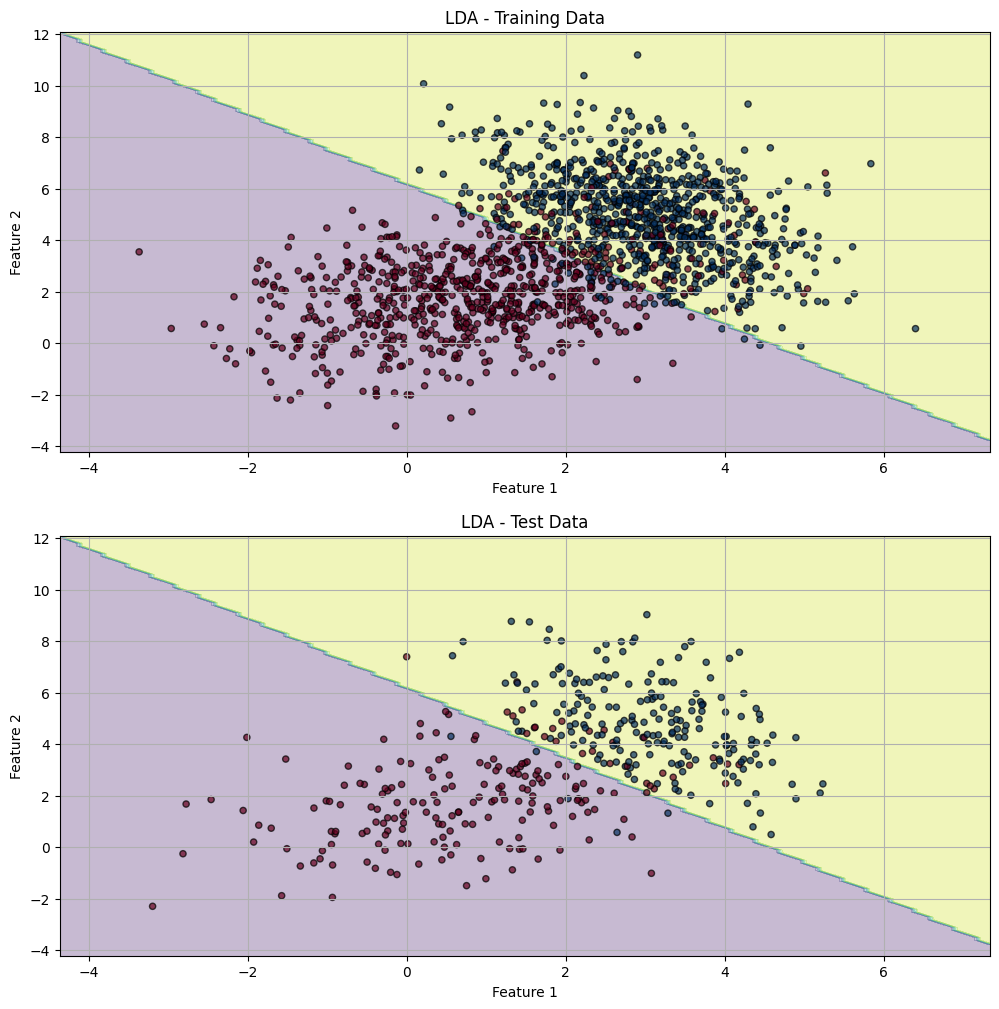

In [32]:
lda_model.visualize(X, y, SEED)